In [2]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [55]:
#loading data
data = yf.download('NVDA', start = '2023-01-01' , end = '2024-02-22')

[*********************100%%**********************]  1 of 1 completed


In [56]:
#computing exponential mean and std (exponential distribution) such that older observations are given lower weights
span=30
data['Mean'] = data['Adj Close'].ewm(span=span).mean();
data['STD'] = data['Adj Close'].ewm(span=span).std();
data = data.dropna()

In [57]:
data.drop(columns=['Volume'])

,Open,High,Low,Close,Adj Close,Mean,STD
Date,,,,,,,
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.424591,145.327841,3.067503
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.586731,144.352570,2.671151
2023-01-06,144.740005,150.100006,140.339996,148.589996,148.524094,145.501977,3.039169
2023-01-09,152.839996,160.559998,151.410004,156.279999,156.210678,147.938466,5.651682
2023-01-10,155.070007,159.619995,154.720001,159.089996,159.019440,150.106284,6.922477
...,...,...,...,...,...,...,...
2024-02-14,732.020020,742.359985,719.380005,739.000000,739.000000,627.263919,88.258126
2024-02-15,738.690002,739.750000,724.000000,726.580017,726.580017,633.671409,88.897625
2024-02-16,741.000000,744.020020,725.010010,726.130005,726.130005,639.636480,89.031800


In [58]:
# Alpha = The weight decided by the user

alpha = 2/(span + 1)
alpha*100

6.451612903225806

In [59]:
#creating Bollinger Bands
data['bb_up'] = data['Mean'] + 1 * data['STD'];
data['bb_down'] = data['Mean'] - 1 * data['STD'];

/var/folders/99/f0_1v63n6lx9tlf8rjrf5j0m0000gn/T/ipykernel_5015/3577058274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bb_up'] = data['Mean'] + 1 * data['STD'];
/var/folders/99/f0_1v63n6lx9tlf8rjrf5j0m0000gn/T/ipykernel_5015/3577058274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bb_down'] = data['Mean'] - 1 * data['STD'];


In [60]:
# trading signals 

long = data['Adj Close'] <= data['bb_down']
short = data['Adj Close'] >= data['bb_up']

#net position 

data['Position']= np.nan
data.loc[long, 'position']=1
data.loc[short, 'position']=-1

/var/folders/99/f0_1v63n6lx9tlf8rjrf5j0m0000gn/T/ipykernel_5015/153360440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position']= np.nan
/var/folders/99/f0_1v63n6lx9tlf8rjrf5j0m0000gn/T/ipykernel_5015/153360440.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[long, 'position']=1


In [61]:
# forward fill position results 

data['position'].fillna(inplace=True, method = 'ffill')

/var/folders/99/f0_1v63n6lx9tlf8rjrf5j0m0000gn/T/ipykernel_5015/2293022583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position'].fillna(inplace=True, method = 'ffill')


Text(0.5, 1.0, 'Bollinger Band Mean Reversion Strategy')

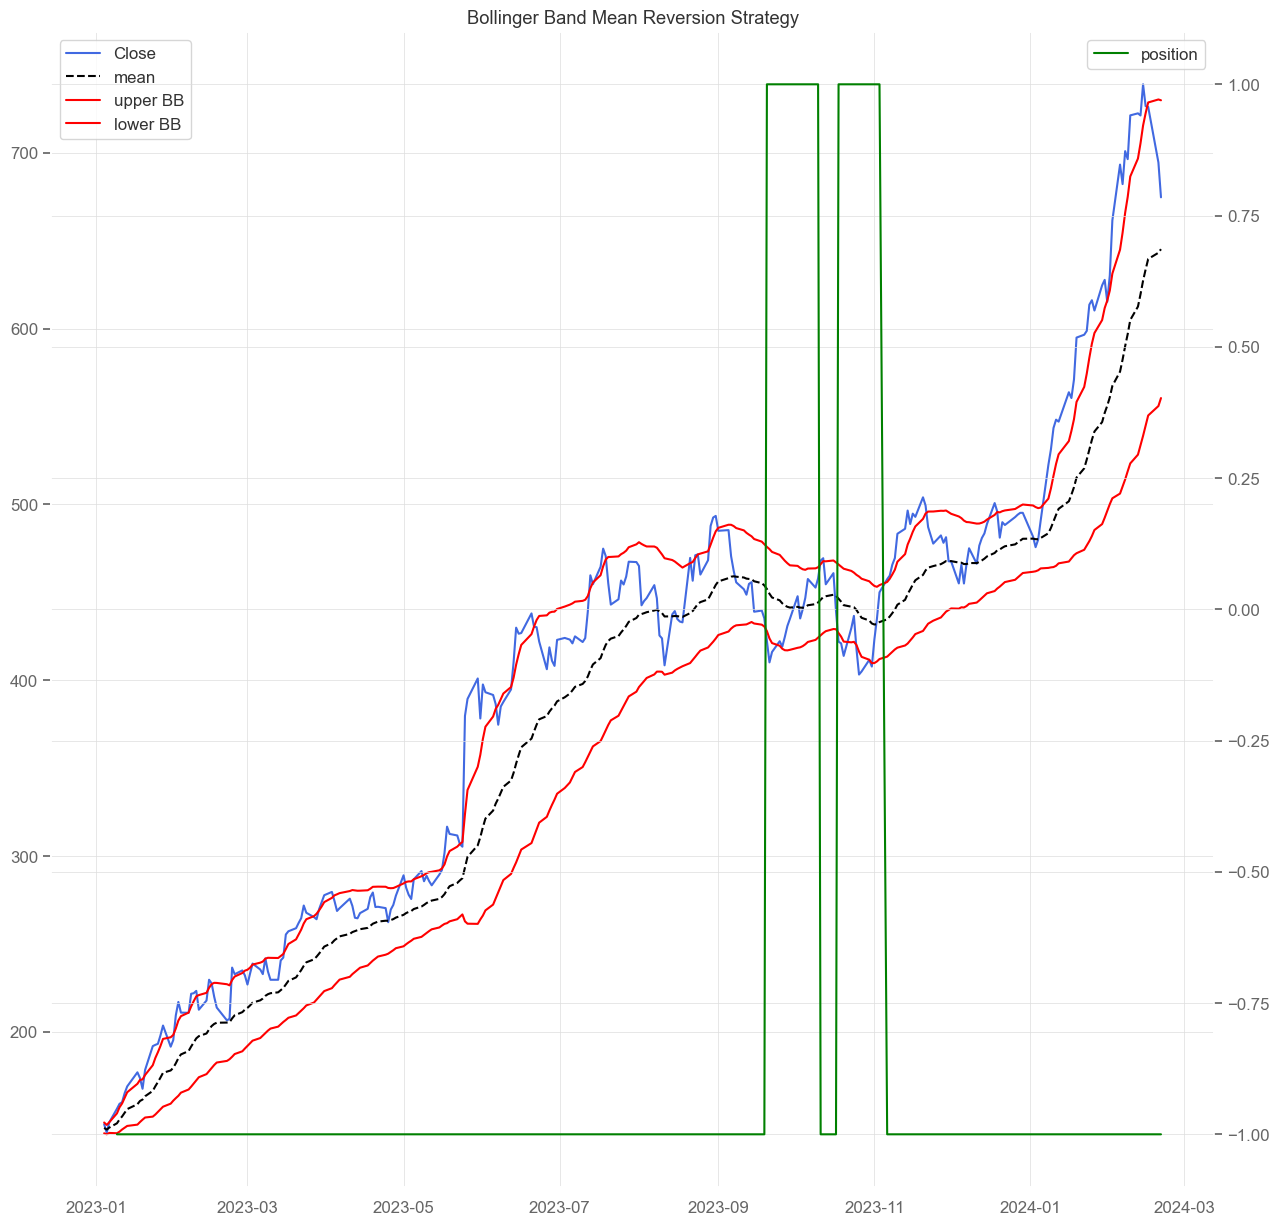

In [62]:
#ploting 

fig, ax1 = plt.subplots(figsize=(15,15))
ax1.plot(data['Adj Close'], label='Close' , color = 'royalblue')
ax1.plot(data['Mean'] , label = 'mean' , color = 'black' , linestyle = '--')
ax1.plot(data['bb_up'] , label='upper BB' , color = 'red')
ax1.plot(data['bb_down'] , label = 'lower BB' , color = 'red')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data['position'] , color='green' , label='position')
plt.legend()
plt.title('Bollinger Band Mean Reversion Strategy')

In [63]:
#compute passive buy and hold log returns
data['log_returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

#compute strategy returns, shift by 1 day to mitigate look ahead bias
data['strategy_returns'] = data['log_returns'] * data['position'].shift(1)

/var/folders/99/f0_1v63n6lx9tlf8rjrf5j0m0000gn/T/ipykernel_5015/4161556259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
/var/folders/99/f0_1v63n6lx9tlf8rjrf5j0m0000gn/T/ipykernel_5015/4161556259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strategy_returns'] = data['log_returns'] * data['position'].shift(1)


                    Strategy
------------------  ----------
Start Period        2023-01-10
End Period          2024-02-21
Risk-Free Rate      3.5%
Time in Market      100.0%

Cumulative Return   -70.5%
CAGR﹪              -53.04%

Sharpe              -2.22
Prob. Sharpe Ratio  0.07%
Sortino             -2.59
Sortino/√2          -1.83
Omega               0.67

Max Drawdown        -72.53%
Longest DD Days     407

Gain/Pain Ratio     -0.32
Gain/Pain (1M)      -0.72

Payoff Ratio        0.81
Profit Factor       0.68
Common Sense Ratio  0.51
CPC Index           0.25
Tail Ratio          0.74
Outlier Win Ratio   2.69
Outlier Loss Ratio  3.27

MTD                 -9.32%
3M                  -26.42%
6M                  -10.47%
YTD                 -27.42%
1Y                  -58.84%
3Y (ann.)           -53.04%
5Y (ann.)           -53.04%
10Y (ann.)          -53.04%
All-time (ann.)     -53.04%

Avg. Drawdown       -72.53%
Avg. Drawdown Days  407
Recovery Factor     1.51
Ulcer Index         0.57
Sere

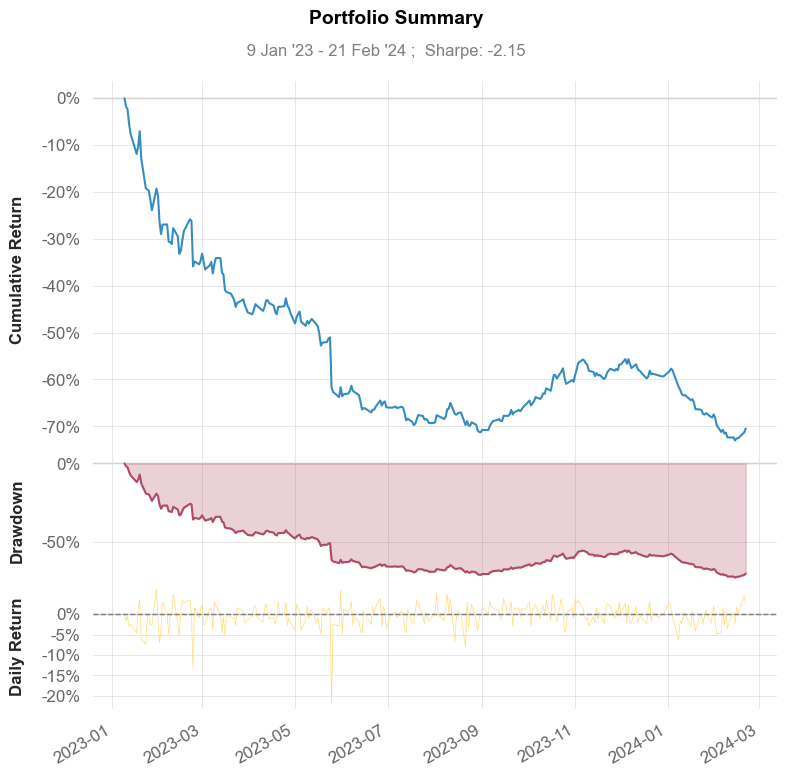

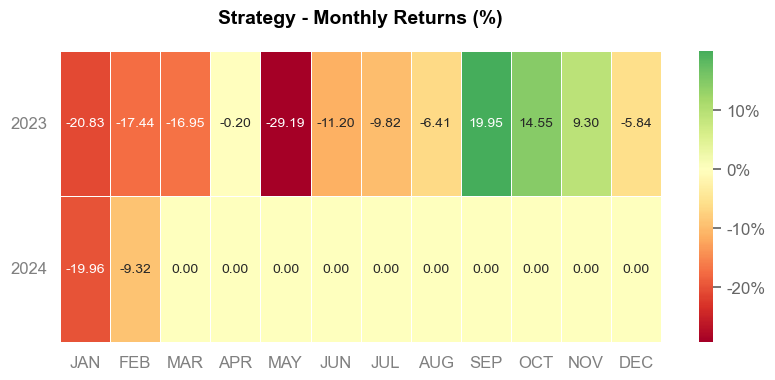

In [64]:
#create tear sheet

import quantstats as qs

qs.reports.basic(data['strategy_returns'], rf=0.035)